# Project: No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Review of the dataset and the entities within

The dataset has data collected from 110,527 medical appointments in Brazil and is centered around if the patient had shown up for their scheduled appointment. There are several different pieces of data that we can anaylize from this dataset that could help in understanding questions surounding patients not showing up for their appointments. The data used in this project is from Kaggle.com.

- `ScheduledDay` tells us on what day the patient set up their appointment.
- `Neighborhood` indicates the location of the hospital.
- `Scholarship` indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Familia.
- `No-show` indicates if a patient did not show up for their appointment. `Yes` being a no show and `No` meaning they did show up.


<a id='intro'></a>
## Introduction and Question Asked

This report will be analyizing the data by following the data analysis process: Asking question(s), Wrangling data, Drawing conclusions, and Communicating our results.

The question that is being asked: Which attribute has the strongest correlation with no-shows and how strong the correlation between the two?

In [1]:
#importing libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

We will need to gather, asses, and clean our data.

### General Properties

In [2]:
#loading our data
df=pd.read_csv('noshowappointments.csv')

#Looking at the 5 first rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#Looking at info to find missing values or incorrect data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


`AppointmentDay` and `ScheduleDay` both are string objects rather than datetime. There are no null values.

In [4]:
#Checking description to look for incorrect data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The age data has some values that are less than 0. There are also typos in the column names 'Hipertension' and 'Handcap' that should be corrected.

In [5]:
#Looking for any duplicated rows
df[df.duplicated()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


There are no duplicated rows in our dataset.

### Data Cleaning

- Correct typos in the column names.
- Convert the data type of `ScheduledDay` and `AppointmentDay` to datetime.
- Convert the data type of `No_show` to bool as it will make it easier to work with
- Remove the timestamp from `ScheduledDay` and `AppointmentDay` as one doesn't have any time listed and the other would suggest that the appointment was scheduled after the appointment time.
- Drop the row that has -1 as age.

In [6]:
#Correcting column names
df=df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap','PatientId':'PatientID','No-show':'No_show',
                     'ScheduledDay':'Scheduled_Day','AppointmentDay':'Appointment_Day'})
df.query('Age==115')

,PatientID,AppointmentID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [7]:
#As the timestamp in ScheduledDay makes it appear like it was after the AppointmentDay when the appointment was scheduled in the
#isame day we will remove the timestamp to do this I will have to convert to datetime then strip the time and convert it again

df['Scheduled_Day']= pd.to_datetime(df['Scheduled_Day']).dt.date
df['Appointment_Day']= pd.to_datetime(df['Appointment_Day']).dt.date
df['Appointment_Day']= pd.to_datetime(df['Appointment_Day'])
df['Scheduled_Day']= pd.to_datetime(df['Scheduled_Day'])
df[['Scheduled_Day','Appointment_Day']].info()
df[['Scheduled_Day','Appointment_Day']].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Scheduled_Day    110527 non-null  datetime64[ns]
 1   Appointment_Day  110527 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.7 MB


,Scheduled_Day,Appointment_Day
0,2016-04-29,2016-04-29
1,2016-04-29,2016-04-29
2,2016-04-29,2016-04-29
3,2016-04-29,2016-04-29
4,2016-04-29,2016-04-29


In [8]:
#Changing `No_show` to bool dtype
df['No_show'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['No_show'] = df['No_show'].astype('bool')

In [9]:
#droping ages less than 0
df.drop(df.loc[df['Age']<0].index, inplace=True)
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question: Which attribute has the strongest correlation with no-shows and how strong the correlation between the two?

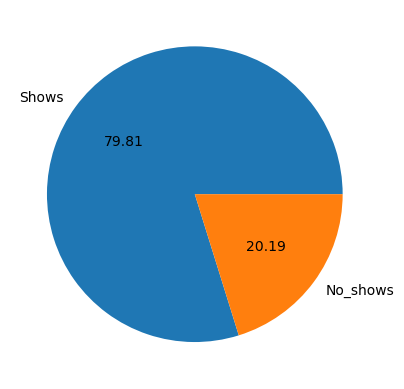

In [10]:
#Creating a callable function to look at proportions for No-show appointments
def pie_with_perc(df):
    plt.figure()
    values = df.No_show.value_counts() 
    labels = ['Shows','No_shows'] 
    plt.pie(values, labels=labels, autopct='%.2f')
    plt.show()
#looking at proportions
pie_with_perc(df)

In [11]:
#Looking for correlations to determine the strongest relations
df.corr().style.background_gradient(cmap="Greens")

,PatientID,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
PatientID,1.000000,0.004023,-0.004121,-0.002877,-0.006436,0.001608,0.011014,-0.007915,-0.009742,-0.001456
AppointmentID,0.004023,1.000000,-0.019106,0.022619,0.012759,0.022632,0.032946,0.014107,-0.256613,-0.162597
Age,-0.004121,-0.019106,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,-0.060327
Scholarship,-0.002877,0.022619,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,0.029134
Hypertension,-0.006436,0.012759,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,-0.035704
Diabetes,0.001608,0.022632,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,-0.015181
Alcoholism,0.011014,0.032946,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,-0.000197
Handicap,-0.007915,0.014107,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,-0.006077
SMS_received,-0.009742,-0.256613,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,0.126428
No_show,-0.001456,-0.162597,-0.060327,0.029134,-0.035704,-0.015181,-0.000197,-0.006077,0.126428,1.000000


Looking at the correlation grid it looks like the strongest correlation between a patient not showing up for their appointment is based upon whether or not they recieved a sms message. It is curious that the data suggests that recieving a sms message suggests that a patient is less likely to show up.

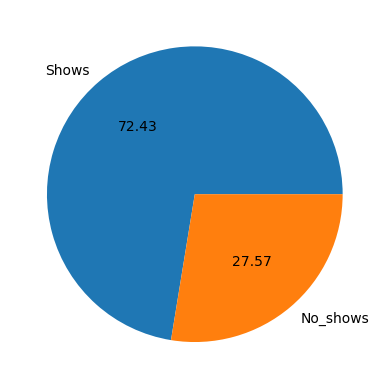

In [12]:
df_sms=df.query('SMS_received==True')
pie_with_perc(df_sms)

Patients that recieved sms reminders were roughly 7.5% more likely to no-show for an appointment.To dive deeper into why this might be the case we will look at the proportions of people that are recieving a sms message and 
if sms messages are being sent to a certain patient group. Looking back at our correlation matrix The strongest positive correlation between those that are recieving sms messages another attribute looks to be age.

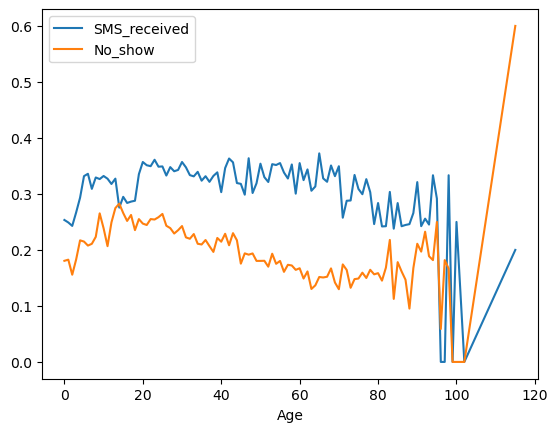

In [13]:
#comparing percentages of sms_recieved and no_shows accros all ages
df_age=df.groupby('Age').mean()
df_age.SMS_received.plot.line()
df_age.No_show.plot.line()
plt.legend();

It appears that patients in the age range from roughly 40-90 years old are more likely to pay attention to the text message reminders and patients below and over that age may be ignoring the text message reminders. This information does not help explain why there are more no-shows when the patient recieves a sms alert.

It is possible that there is another factor that would explain the behavoir of more no_shows showing up with patients have recieved sms messages and that would be time from when they scheduled their appointment to the actual appointment date.

In [14]:
#Looking at the average difference between appointment day and when it was originally scheduled
def calc_day_diff(df):
    day_diff= round(pd.to_timedelta(df['Appointment_Day'] - df['Scheduled_Day'],'D') / np.timedelta64(1, 'D')).astype('int')
    #Looking at the data I found appointments that show to be scheduled after the appointment so normalizing those values 
    #to reflect 0
    return day_diff.clip(lower=0)
day_diff=calc_day_diff(df)
print(day_diff.mean())

10.183884334907624


In [15]:
#Looking at the average difference for patients that recieved a sms message
df_sms=df.query('SMS_received==True')
sms_day_diff=calc_day_diff(df_sms)
print(sms_day_diff.mean())

19.016712699396876


In [16]:
#Looking at the average difference for patients that where a no-show for their appointment
df_ns=df.query('No_show==True')
ns_day_diff = calc_day_diff(df_ns)
print(ns_day_diff.mean())

15.831936914736323


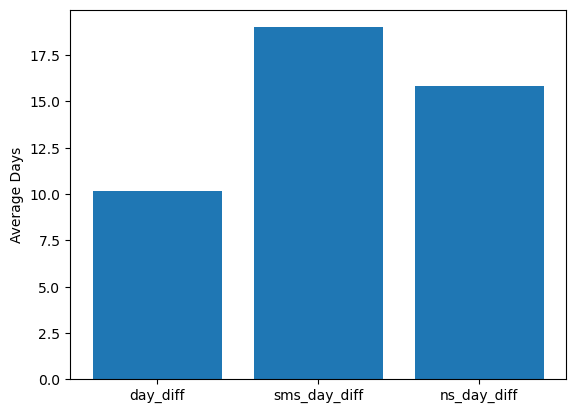

In [17]:
diff_arr=[day_diff.mean(),sms_day_diff.mean(),ns_day_diff.mean()]
plt.bar([1,2,3],diff_arr, tick_label=['day_diff','sms_day_diff', 'ns_day_diff'])
plt.ylabel('Average Days');

It looks like there are significantly more days inbetween scheduled day and appointment day for patients that are recieving a sms message reminder. This data would suggest that there is some threshold of days between the scheduling and appointment date that they will start sending sms messages to patients. It also looks like there are a much more no-shows for patients that have scheduled their appointments earlier.

In [18]:
day_diff.mean()/sms_day_diff.mean()*100

53.55228580190209

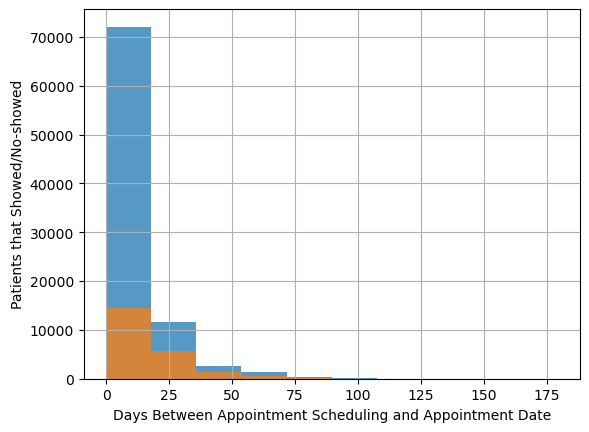

In [19]:
df['day_diff']=day_diff
df.day_diff[df.No_show == False].hist(alpha=0.75, bins=10);
df.day_diff[df.No_show == True].hist(alpha=0.75, bins=10);
plt.xlabel('Days Between Appointment Scheduling and Appointment Date')
plt.ylabel('Patients that Showed/No-showed');

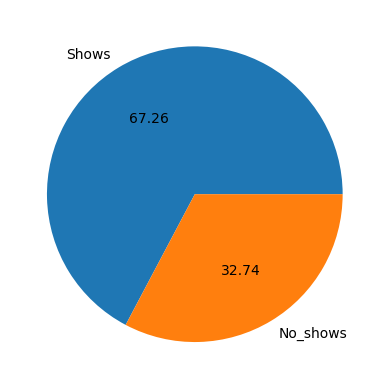

In [20]:
df_over_15=df.query('day_diff >= 15')
pie_with_perc(df_over_15)

This visualization clearly shows that the earlier the appointment was scheduled the more likely a patient is to not show up for it. The percentage of no shows goes up by over 12% of patients when the appointment was scheduled at least 15 days in advance.

<a id='conclusions'></a>
## Conclusions


After analyzing the data to see which attributes have the strongest correlation between not showing up for their appointment it was clear that the attribute that had the strongest correlation was if a patient recieved an SMS message or not. Looking deeper into the reason behind this we found that clients that schedule their appointment further in advance are the patients that are recieving this sms message, and the distance between when a patient scheduled their appointment and the actual appointment date was the root cause behind this correlation.

We would be able to make recommendations based upon these findings that the reminder system in place could probably be improved upon and that scheduling appointments closer to the appointment date could drastically cut down on the number of patients not showing up for appointments.

The limitations that we experienced were around not knowing the exact process behind when a sms message is sent out or not. It could be the case that they send it out to any client that is not.